
## **Name:* Noor ul Ain Khurshid*


#**4.0 Thoughts on Words - Introduction**

Let’s walk through a thought experiment. Let’s assume you have some TF-IDF vector
for a particular document and you want to convert that to a topic vector. You can think
about how much each word contributes to your topics.
Let’s say you’re processing some sentences about pets in Central Park in New York
City (NYC). Let’s create three topics: one about pets, one about animals, and another
about cities. Call these topics “petness,” “animalness,” and “cityness.” So your “petness”
topic about pets will score words like “cat” and “dog” significantly, but probably ignore
words like “NYC” and “apple.” The “cityness” topic will ignore words like “cat” and “dog,”
but might give a little weight to “apple,” just because of the “Big Apple” association.
If you “trained” your topic model like this, without using a computer, only your
common sense, you might come up with some weights like this:

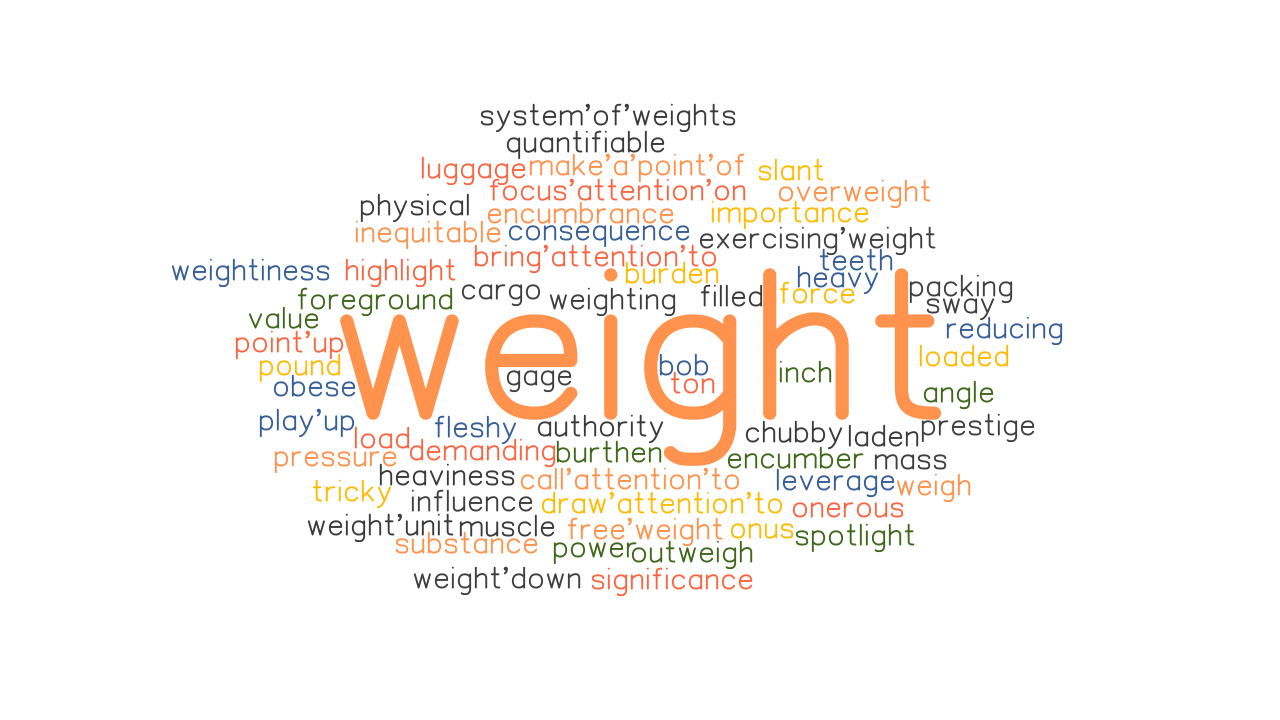

In [1]:
import numpy as np
topic = {}
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))

This tfidf vector is just a random example, as if it
were computed for a single document that
contained these words in some random proportion.

“Hand-crafted” weights
(.3, .3, 0, 0, -.2, .2) are multiplied
by imaginary tfidf values to create
topic vectors for your imaginary
random document. You’ll compute
real topic vectors later.

In [2]:
topic['pet'] = (.3 * tfidf['cat'] + .3 * tfidf['dog'] + 0 * tfidf['apple']
                + 0 * tfidf['lion'] - .2 * tfidf['NYC'] + .2 * tfidf['love'])
topic['animal'] = (.1 * tfidf['cat'] + .1 * tfidf['dog'] - .1 * tfidf['apple']
                   + .5 * tfidf['lion'] + .1 * tfidf['NYC'] - .1 * tfidf['love'])
topic['city'] = (0 * tfidf['cat'] - .1 * tfidf['dog'] + .2 * tfidf['apple']
                 - .1 * tfidf['lion'] + .5 * tfidf['NYC'] + .1 * tfidf['love'])

Notice the small amount of the word “apple” into the topic vector for “city.” This
could be because you’re doing this by hand and we humans know that “NYC” and “Big
Apple” are often synonymous. Our semantic analysis algorithm will hopefully be able
to calculate this synonymy between “apple” and “NYC” based on how often “apple”
and “NYC” occur in the same documents.

The relationships between words
and topics can be “flipped.” The 3 x 6 matrix of three topic vectors can be transposed
to produce topic weights for each word in your vocabulary. These vectors of weights
would be your word vectors for your six words

In [3]:
word_vector = {}
word_vector['cat'] = .3 * topic['pet'] + .1 * topic['animal'] + 0 * topic['city']
word_vector['dog'] = .3 * topic['pet'] + .1 * topic['animal'] - .1 * topic['city']
word_vector['apple'] = 0 * topic['pet'] - .1 * topic['animal'] + .2 * topic['city']
word_vector['lion'] = 0 * topic['pet'] + .5 * topic['animal'] - .1 * topic['city']
word_vector['NYC'] = -.2 * topic['pet'] + .1 * topic['animal'] + .5 * topic['city']
word_vector['love'] = .2 * topic['pet'] - .1 * topic['animal'] + .1 * topic['city']

These six topic vectors (shown in Figure 4.1), one for each word, represent the meanings
of your six words as 3D vectors.

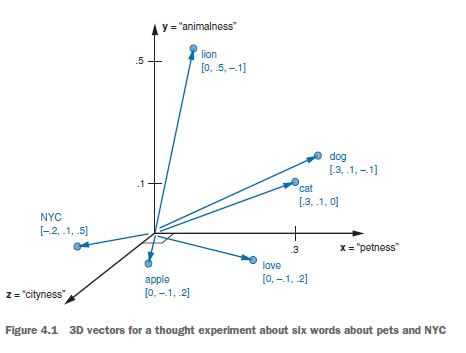

In [4]:
!pip install nlpia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.6/706.6 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00


In [5]:
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
word_topic_vectors.T.round(1)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.9/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.9/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.9/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
/usr/local/lib/python3.9/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is depreca

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


# **4.1 An LDA Classifier**

LDA (Linear Discriminant Analysis) is one of the most straightforward and fast dimension reduction and classification
models you’ll find. However it's not very flashy thus it is less talked about

LDA classifier is a supervised algorithm, so you do need labels for your document classes. But LDA requires far fewer samples than fancier algorithms.

For this example, we show you a simplified implementation of LDA that you can’t
find in scikit-learn. The model “training” has only three steps, so you’ll just do
them all directly in Python:
1. Compute the average position (centroid) of all the TF-IDF vectors within the
class (such as spam SMS messages).
2. Compute the average position (centroid) of all the TF-IDF vectors not in the
class (such as nonspam SMS messages).
3. Compute the vector difference between the centroids (the line that connects
them).

All you need to “train” an LDA model is to find the vector (line) between the two centroids
for your binary class. LDA is a supervised algorithm, so you need labels for your
messages. To do inference or prediction with that model, you just need to find out if a
new TF-IDF vector is closer to the in-class (spam) centroid than it is to the out-of-class
(nonspam) centroid. First let’s “train” an LDA model to classify SMS messages as spam
or nonspam (see the following listing).

**SMS Spam Example**

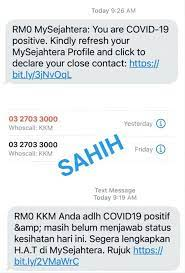

In [6]:
import pandas as pd
from nlpia.data.loaders import get_data
pd.options.display.width = 120
sms = get_data('sms-spam')
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
sms['spam'] = sms.spam.astype(int)
len(sms)


4837

In [7]:
index

['sms0',
 'sms1',
 'sms2!',
 'sms3',
 'sms4',
 'sms5!',
 'sms6',
 'sms7',
 'sms8!',
 'sms9!',
 'sms10',
 'sms11!',
 'sms12!',
 'sms13',
 'sms14',
 'sms15!',
 'sms16',
 'sms17',
 'sms18',
 'sms19!',
 'sms20',
 'sms21',
 'sms22',
 'sms23',
 'sms24',
 'sms25',
 'sms26',
 'sms27',
 'sms28',
 'sms29',
 'sms30',
 'sms31',
 'sms32',
 'sms33',
 'sms34!',
 'sms35',
 'sms36',
 'sms37',
 'sms38',
 'sms39',
 'sms40',
 'sms41',
 'sms42!',
 'sms43',
 'sms44',
 'sms45',
 'sms46',
 'sms47',
 'sms48',
 'sms49',
 'sms50',
 'sms51',
 'sms52',
 'sms53',
 'sms54!',
 'sms55',
 'sms56!',
 'sms57',
 'sms58',
 'sms59',
 'sms60',
 'sms61',
 'sms62',
 'sms63',
 'sms64',
 'sms65!',
 'sms66',
 'sms67!',
 'sms68!',
 'sms69',
 'sms70',
 'sms71',
 'sms72',
 'sms73',
 'sms74',
 'sms75',
 'sms76',
 'sms77',
 'sms78',
 'sms79',
 'sms80',
 'sms81',
 'sms82',
 'sms83',
 'sms84',
 'sms85',
 'sms86',
 'sms87',
 'sms88',
 'sms89',
 'sms90',
 'sms91',
 'sms92',
 'sms93!',
 'sms94',
 'sms95!',
 'sms96',
 'sms97',
 'sms98',
 's

In [8]:
sms.spam.sum()

638

In [9]:
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only in bu..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup final tkt...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives around h..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's now an...


So you have 4,837 SMS messages, and 638 of them are labeled with the binary class
label “spam.”
Now let’s do our tokenization and TF-IDF vector transformation on all these SMS
messages:

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs.shape

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(4837, 9232)

In [11]:
sms.spam.sum()

638

The nltk.casual_tokenizer gave you 9,232 words in your vocabulary. You have
almost twice as many words as you have messages. And you have almost ten times as
many words as spam messages. Usually, a Naive Bayes
classifier won’t work well when your vocabulary is much larger than the number of labeled examples in your dataset. That’s where the semantic analysis techniques can help.

We could use sklearn.discriminant_analysis.LinearDiscriminant-
Analysis. But you only need compute the centroids of your binary class (spam and
nonspam) in order to “train” this model, so you’ll do that directly:

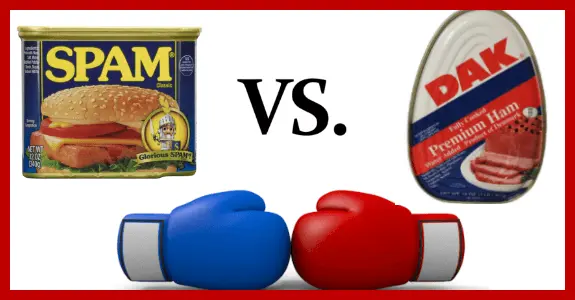

In [12]:
#You can use this mask to select only the spam rows from a numpy.array or pandas.DataFrame
mask = sms.spam.astype(bool).values

# Because your TF-IDF vectors are row vectors, you need to make sure numpy computes the mean for each column independently using axis=0
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)
spam_centroid.round(2)

array([0.06, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [13]:
ham_centroid.round(2)

array([0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [14]:
#The dot product computes the “shadow” or projection of each vector on the line between the centroids
spamminess_score = tfidf_docs.dot(spam_centroid -ham_centroid)
spamminess_score.round(2)

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

Figure 4.2 shows a view of the TF-IDF vectors in 3D and where these centroids are
for your SMS messages. The arrow from the nonspam centroid to the spam centroid is the line that defines
your trained model. You can see how some of the green dots are on the back side of
the arrow, so you could get a negative spamminess score when you project them onto
this line between the centroids.

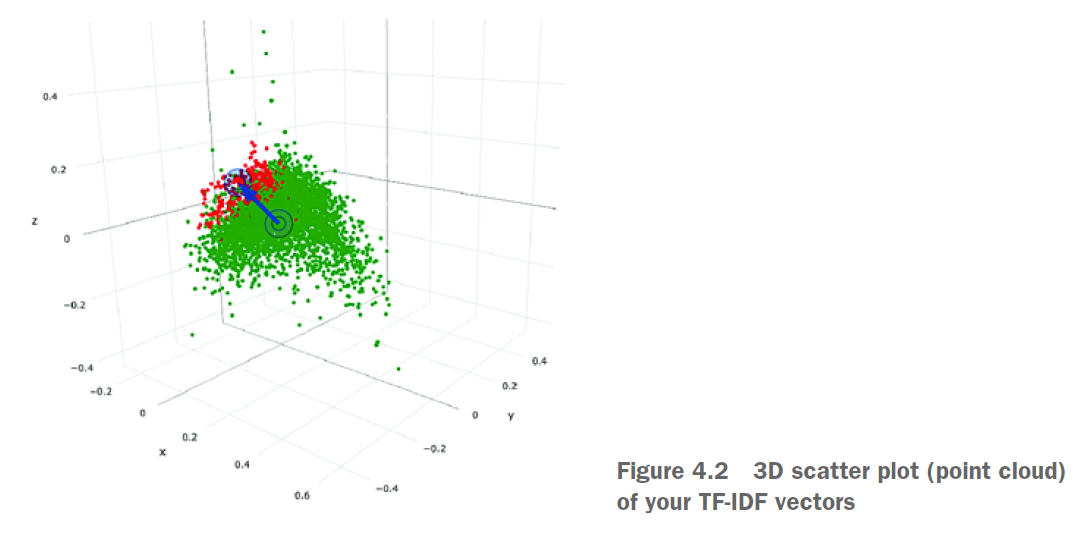

Ideally, you’d like your score to range between 0 and 1, like a probability. The
sklearnMinMaxScaler can do that for you:

In [15]:
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform( spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score > .5).astype(int)
sms['spam lda_predict lda_score'.split()].round(2).head(6)

,spam,lda_predict,lda_score
sms0,0,0,0.23
sms1,0,0,0.18
sms2!,1,1,0.72
sms3,0,0,0.18
sms4,0,0,0.29
sms5!,1,1,0.55


In [16]:
(1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms)).round(3)

0.977

97.7% of the messages were classified correctly with this simple model

In [17]:
from pugnlp.stats import Confusion
Confusion(sms['spam lda_predict'.split()])

/usr/local/lib/python3.9/dist-packages/pugnlp/stats.py:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
/usr/local/lib/python3.9/dist-packages/pugnlp/stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__setattr__('_hist_labels', self.sum().astype(int))
/usr/local/lib/python3.9/dist-packages/pugnlp/stats.py:510: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self, '_hist_classes', self.T.sum())
/usr/local/lib/python3.9/dist-packages/pugnlp/stats.py:513: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  setattr(self, '_tp'

lda_predict,0,1
spam,,
0,4135,64
1,45,593


Confusion matrix refresher:

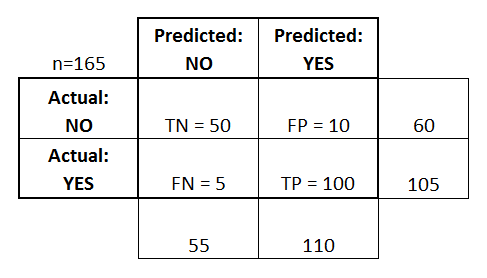

#**4.2 Latent Semantic Analysis**

Latent semantic analysis is a mathematical technique for finding the “best” way to
linearly transform (rotate and stretch) any set of NLP vectors, like your TF-IDF vectors
or bag-of-words vectors. And the “best” way for many applications is to line up the axes
(dimensions) in your new vectors with the greatest “spread” or variance in the word
frequencies. You can then eliminate those dimensions in the new vector space that
don’t contribute much to the variance in the vectors from document to document.

LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.

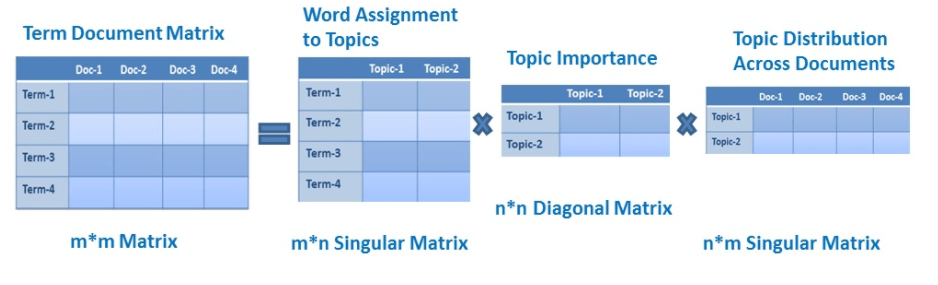

**Singular Value Decomposition(SVD)**
SVD is a matrix factorization method that represents a matrix in the product of two matrices. It offers various useful applications in signal processing, psychology, sociology, climate, and atmospheric science, statistics and astronomy.

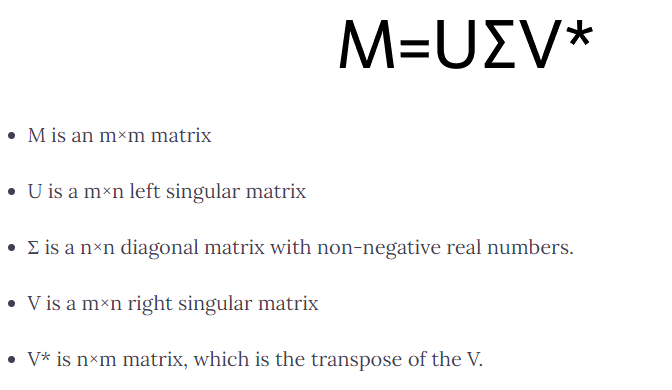

**Identity matrix**: It is a square matrix in which all the elements of the principal diagonal are ones, and all other elements are zeros.

**Diagonal Matrix**: It is a matrix in which the entries other than the main diagonal are all zero.

**Singular Matrix**: A matrix is singular if its determinant is 0 or a square matrix that does not have a matrix inverse.

#**4.3 Single Value Decomposition**

Singular value decomposition is the algorithm behind LSA. Let’s start with a corpus of
only 11 documents and a vocabulary of 6 words, similar to what you had in mind for
your thought experiment

First lets create a document-term matrix where each row is a vector of the bag-of-words for a document.

In [18]:
from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm

100%|██████████| 263/263 [00:00<00:00, 166707.26it/s]


In [19]:
bow_svd, tfidf_svd = lsa_models() #cats_and_dogs corpus using the vocabulary from the thought experiment.
prettify_tdm(**bow_svd)

100%|██████████| 263/263 [00:00<00:00, 49738.57it/s]


,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


limited the vocabulary to match the thought experiment. And you limited
the corpus to only a few (11) documents that use the 6 words in your vocabulary.
Unfortunately, the sorting algorithm and the limited vocabulary created several identical
bag-of-words vectors (NYC, apple). But **SVD** should be able to “see” that and allocate
a topic to that pair of words.

In [20]:
tdm = bow_svd['tdm']
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


SVD is an algorithm for decomposing any matrix into three “factors,” three matrices
that can be multiplied together to recreate the original matrix.

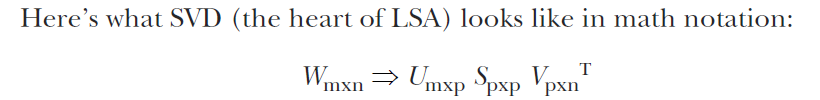

## **U—left singular vectors**

The U matrix contains the term-topic matrix that tells you about “the company a word
keeps.” This is the most important matrix for semantic analysis in NLP. The U matrix
is called the “left singular vectors” because it contains row vectors that should be multiplied
by a matrix of column vectors from the left

In [21]:
import numpy as np
U, s, Vt = np.linalg.svd(tdm)
import pandas as pd
pd.DataFrame(U, index=tdm.index).round(2)

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,-0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


## **S—singular values**

The Sigma or S matrix contains the topic “singular values” in a square diagonal matrix.
The singular values tell you how much information is captured by each dimension in
your new semantic (topic) vector space. A diagonal matrix has nonzero values only
along the diagonal from the upper left to the lower right. Everywhere else the S matrix
will have zeros. So numpy saves space by returning the singular values as an array, but
you can easily convert it to a diagonal matrix with the numpy.diag function, as shown
in the following listing

In [22]:
s.round(1)

array([3.1, 2.2, 1.8, 1. , 0.8, 0.5])

In [23]:
S = np.zeros((len(U), len(Vt)))
pd.np.fill_diagonal(S, s)
pd.DataFrame(S).round(1)

<ipython-input-23-f0a3dc0e8d4d>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.fill_diagonal(S, s)


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


## **V^T—right singular vectors**


ontains the “right singular vectors” as the columns of the documentdocument
matrix. This gives you the shared meaning between documents, because it
measures how often documents use the same topics in your new semantic model of
the documents.
It has the same number of rows (p) and columns as you have documents
in your small corpus, 11.

In [24]:
pd.DataFrame(Vt).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


##Term-document matrix reconstruction error

In [25]:
err = []
for numdim in range(len(s), 0, -1):
  S[numdim - 1, numdim - 1] = 0
  reconstructed_tdm = U.dot(S).dot(Vt)
  err.append(np.sqrt(((reconstructed_tdm - tdm).values.flatten() ** 2).sum()/ np.product(tdm.shape)))
np.array(err).round(2)

array([0.06, 0.12, 0.17, 0.28, 0.39, 0.55])

#**4.4 Principal component analysis**

Principal component analysis is another name for SVD when it’s used for dimension
reduction, like you did to accomplish your latent semantic analysis earlier. And the
PCA model in scikit-learn has some tweaks to the SVD math that will improve the
accuracy of your NLP pipeline.

sklearn.PCA automatically “centers” your data by subtracting off the
mean word frequencies. Another, more subtle trick is that PCA uses a function called
flip_sign to deterministically compute the sign of the singular vectors

Let’s see how SVD will do on some natural language documents. Let’s find the principal
components using SVD on the 5,000 SMS messages labeled as spam (or not). SPAM VS HAM. The
vocabulary and variety of topics discussed in this limited set of SMS messages from a
university lab should be relatively small. So let’s limit the number of topics to 16.
You’ll use both the scikit-learn PCA model as well as the truncated SVD model to see if
there are any differences.
First, let’s load the SMS messages from a DataFrame in the nlpia package:

Let’s try the PCA model from scikit-learn let’s wrangle your dataset of 9,232-D TF-IDF vectors
into 16-D topic vectors:

In [26]:
sms = get_data('sms-spam')
index = ['sms{}{}'.format(i, '!'*j)
for (i,j) in zip(range(len(sms)), sms.spam)]

In [27]:
sms.index = index

In [28]:
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only in bu..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup final tkt...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives around h..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's now an...


Now you can calculate the TF-IDF vectors for each of these messages:

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
len(tfidf.vocabulary_)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


9232

In [30]:
tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
tfidf_docs.shape

(4837, 9232)

In [31]:
sms.spam.sum()

638

So you have 4,837 SMS messages with 9,232 different 1-gram tokens from your
tokenizer (casual_tokenize). Only 638 of these 4,837 messages (13%) are labeled
as spam. So you have an unbalanced training set with about 8:1 ham (normal SMS
messages) to spam (unwanted solicitations and advertisements).

The 9,232 tokens in your vocabulary is greater than the 4,837 messages (samples) you
have to go on. So you have many more unique words in your vocabulary (or lexicon)
than you have SMS messages. And of those SMS messages only a small portion of them
(1/8th) are labeled as spam.

Theres a risk of overfitting. Overfitting means that you will “key” off of only a few words in your vocabulary. So
your spam filter will be dependent on those spammy words being somewhere in the
spammy messages it filters out. Spammers could easily get around your filter if they
just used synonyms for those spammy words. If your vocabulary doesn’t include the
spammer’s new synonyms, then your filter will mis-classify those cleverly constructed
SMS messages as ham.

Dimension reduction is the primary countermeasure for overfitting. By consolidating
your dimensions (words) into a smaller number of dimensions (topics), your NLP
pipeline will become more “general.” Your spam filter will work on a wider range of
SMS messages if you reduce your dimensions, or “vocabulary.”

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns,index=index)
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,0.039,-0.066,0.012,-0.082,0.008,0.008,-0.002,-0.039,-0.023,0.041
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,0.023,0.065,0.024,-0.024,-0.004,-0.038,0.042,-0.029,0.050,-0.038
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,-0.000,-0.000,-0.057,0.050,0.125,-0.029,0.021,-0.006,-0.047,0.056
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,-0.166,-0.074,0.063,-0.106,0.021,-0.027,0.070,-0.062,0.013,-0.086
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,-0.044,0.062,-0.044,0.029,0.028,0.018,0.035,0.041,-0.073,-0.019
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,0.005,0.166,-0.023,0.065,0.045,-0.044,-0.029,0.067,0.006,0.013


First let’s assign words to all the dimensions in your PCA transformation. You need to
get them in the right order because your TFIDFVectorizer stores the vocabulary as a
dictionary that maps each term to an index number (column number):

In [33]:
tfidf.vocabulary_

{'go': 3807,
 'until': 8487,
 'jurong': 4675,
 'point': 6296,
 ',': 13,
 'crazy': 2549,
 '..': 21,
 'available': 1531,
 'only': 5910,
 'in': 4396,
 'bugis': 1973,
 'n': 5594,
 'great': 3894,
 'world': 8977,
 'la': 4811,
 'e': 3056,
 'buffet': 1971,
 '...': 25,
 'cine': 2277,
 'there': 8071,
 'got': 3855,
 'amore': 1296,
 'wat': 8736,
 'ok': 5874,
 'lar': 4848,
 'joking': 4642,
 'wif': 8875,
 'u': 8395,
 'oni': 5906,
 'free': 3604,
 'entry': 3195,
 '2': 471,
 'a': 1054,
 'wkly': 8933,
 'comp': 2386,
 'to': 8192,
 'win': 8890,
 'fa': 3328,
 'cup': 2608,
 'final': 3450,
 'tkts': 8180,
 '21st': 497,
 'may': 5272,
 '2005': 487,
 '.': 15,
 'text': 8020,
 '87121': 948,
 'receive': 6688,
 'question': 6574,
 '(': 9,
 'std': 7651,
 'txt': 8379,
 'rate': 6628,
 ')': 10,
 't': 7889,
 '&': 7,
 "c's": 2020,
 'apply': 1383,
 '08452810075': 115,
 'over': 6003,
 '18': 438,
 "'": 8,
 's': 6959,
 'dun': 3041,
 'say': 7034,
 'so': 7438,
 'early': 3069,
 'hor': 4207,
 'c': 2019,
 'already': 1268,
 'then': 

In [34]:
column_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(),tfidf.vocabulary_.keys())))

In [35]:
terms

('!',
 '"',
 '#',
 '#150',
 '#5000',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '. .',
 '. . .',
 '. . . .',
 '. . . . .',
 '. ..',
 '..',
 '.. .',
 '.. . . .',
 '.. ... ...',
 '...',
 '... . . . .',
 '/',
 '0',
 '00',
 '00870405040',
 '0089',
 '01',
 '0121 2025050',
 '01223585236',
 '01223585334',
 '01256987',
 '02',
 '02/06',
 '02/09',
 '0207 153 9153',
 '0207 153 9996',
 '0207-083-6089',
 '02072069400',
 '02073162414',
 '02085076972',
 '03',
 '03530150',
 '04',
 '04/09',
 '05',
 '050703',
 '06',
 '06.05',
 '06/11',
 '07/11',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '0800 0721072',
 '

Now you can create a nice Pandas DataFrame containing the weights, with labels for
all the columns and rows in the right place:

In [36]:
weights = pd.DataFrame(pca.components_, columns=terms,
index=['topic{}'.format(i) for i in range(16)])
pd.options.display.max_columns = 8
weights.head(4).round(3)

,!,"""",#,#150,...,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,...,-0.002,0.001,0.001,0.001
topic1,0.063,0.008,0.000,-0.000,...,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,...,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,...,0.001,0.001,0.001,0.001


Some of those columns (terms) aren’t that interesting, so let’s explore your
tfidf.vocabulary. Let’s see if you can find some of those “half off” terms and which topics
they’re a part of:

In [37]:
pd.options.display.max_columns = 12
deals = weights['! ;) :) half off free crazy deal only $ 80 %'.split()].round(3) * 100
deals

,!,;),:),half,off,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-0.4,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.3,0.0,7.4,0.1,0.4,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,0.3,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.1,0.2,0.3,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.4,-0.1,-0.2,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1
topic5,-26.5,0.1,-1.6,-0.3,-0.7,-1.3,-0.6,-0.2,-1.8,-0.9,0.0,0.0
topic6,-10.8,-0.5,19.9,-0.4,-0.9,-0.6,-0.2,-0.1,-1.4,-0.0,-0.0,-0.1
topic7,15.8,0.1,-18.0,0.8,0.8,-2.9,0.0,0.1,-1.9,-0.3,0.0,-0.1
topic8,34.2,0.1,5.0,-0.4,-0.5,-0.1,-0.4,-0.4,3.2,-0.6,-0.0,-0.2
topic9,7.7,-0.3,16.6,1.4,-0.9,6.2,-0.5,-0.4,3.2,-0.4,-0.0,0.0


Topics 4, 8, and 9 appear to all contain positive “deal” topic sentiment. And topics 0, 3,
and 5 appear to be “anti-deal” topics, messages about stuff that’s the opposite of “deals”:
negative deals. So words associated with “deals” can have a positive impact on some topics
and a negative impact on others. There’s no single obvious “deal” topic number.

This is one of the challenges of LSA, making sense of the topics. LSA only allows for
linear relationships between words. And you usually only have a small corpus to work
with. So your topics tend to combine words in ways that humans don’t find all that
meaningful. Several words from different topics will be crammed together into a single
dimension (principle component) in order to make sure the model captures as
much variance in usage of your 9,232 words as possible.


## Using truncated SVD for SMS message semantic analysis
You’re going to use TruncatedSVD to retain only the 16 most interesting topics,
the topics that account for the most variance in your TF-IDF vectors.

This is a more direct
approach to LSA that bypasses the scikit-learn PCA model so you can see what’s going
on inside the PCA wrapper. It can handle sparse matrices, so if you’re working with
large datasets you’ll want to use TruncatedSVD instead of PCA anyway.

In [38]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns, index=index)
svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,...,0.007,-0.007,0.002,-0.036,-0.014,0.037
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,...,-0.004,0.036,0.043,-0.021,0.051,-0.042
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,...,0.125,0.023,0.026,-0.020,-0.042,0.052
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,...,0.022,0.023,0.073,-0.046,0.022,-0.070
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,...,0.028,-0.009,0.027,0.034,-0.083,-0.021
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,...,0.041,0.055,-0.037,0.075,-0.001,0.020


These topic vectors from TruncatedSVD are exactly the same as what PCA produced!
This result is because you were careful to use a large number of iterations (n_iter),
and you also made sure all your TF-IDF frequencies for each term (column) were centered
on zero (by subtracting the mean for each term).

##**How well does LSA work for spam classification?**

One way to find out how well a vector space model will work for classification is to see
how cosine similarities between vectors correlate with membership in the same class.

Let’s compute the dot product between the first six topic vectors for the first six SMS messages. You should see larger positive
cosine similarity (dot products) between any spam message (“sms2!”):

In [39]:
import numpy as np
svd_topic_vectors = (svd_topic_vectors.T / np.linalg.norm(svd_topic_vectors, axis=1)).T
svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,1.0,0.6,-0.1,0.6,-0.0,-0.3,-0.3,-0.1,-0.3,-0.3
sms1,0.6,1.0,-0.2,0.8,-0.2,0.0,-0.2,-0.2,-0.1,-0.1
sms2!,-0.1,-0.2,1.0,-0.2,0.1,0.4,0.0,0.3,0.5,0.4
sms3,0.6,0.8,-0.2,1.0,-0.2,-0.3,-0.1,-0.3,-0.2,-0.1
sms4,-0.0,-0.2,0.1,-0.2,1.0,0.2,0.0,0.1,-0.4,-0.2
sms5!,-0.3,0.0,0.4,-0.3,0.2,1.0,-0.1,0.1,0.3,0.4
sms6,-0.3,-0.2,0.0,-0.1,0.0,-0.1,1.0,0.1,-0.2,-0.2
sms7,-0.1,-0.2,0.3,-0.3,0.1,0.1,0.1,1.0,0.1,0.4
sms8!,-0.3,-0.1,0.5,-0.2,-0.4,0.3,-0.2,0.1,1.0,0.3
sms9!,-0.3,-0.1,0.4,-0.1,-0.2,0.4,-0.2,0.4,0.3,1.0


Reading down the “sms0” column (or across the “sms0” row), the cosine similarity
between “sms0” and the spam messages (“sms2!,” “sms5!,” “sms8!,” “sms9!”) is significantly
negative. The topic vector for “sms0” is significantly different from the topic
vector for spam messages. A nonspam message doesn’t talk about the same thing as
spam messages.

This is how semantic search works as well. You can use the cosine similarity
between a query vector and all the topic vectors for your database of documents to
find the most semantically similar message in your database. The closest document
(smallest distance) to the vector for that query would correspond to the document
with the closest meaning. Spaminess is just one of the “meanings” mixed into your
SMS message topics.

#**4.5 Latent Dirichlet allocation (LDiA)**

LDiA does a lot of the things you did to create your topic models with LSA (and
SVD under the hood), but unlike LSA, LDiA assumes a Dirichlet distribution of word
frequencies. It’s more precise about the statistics of allocating words to topics than the
linear math of LSA.

LDiA creates a semantic vector space model (like your topic vectors) using an
approach similar to how your brain worked during the thought experiment earlier. LDiA assumes that each document is a mixture (linear combination) of some arbitrary
number of topics that you select when you begin training the LDiA model. LDiA also assumes that each topic can be represented by a distribution of words (term frequencies).

## LDiA topic model for SMS messages

LDiA works with raw BOW count vectors rather than normalized TF-IDF vectors.
Here’s an easy way to compute BOW vectors in scikit-learn

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize
np.random.seed(42)
counter = CountVectorizer(tokenizer=casual_tokenize)
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(), index=index)
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(),counter.vocabulary_.keys())))
bow_docs.columns = terms

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Let’s double-check that your counts make sense for that first SMS message labeled
“sms0”:

In [41]:
sms.loc['sms0'].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
bow_docs.loc['sms0'][bow_docs.loc['sms0'] > 0].head()

,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64

And here’s how to use LDiA to create topic vectors for your SMS corpus:

In [43]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA
ldia = LDiA(n_components=16, learning_method='batch')
ldia = ldia.fit(bow_docs)
ldia.components_.shape

(16, 9232)

So your model has allocated your 9,232 words (terms) to 16 topics (components).
Let’s take a look at the first few words and how they’re allocated to your 16 topics.

LDiA is a stochastic
algorithm that relies on the random number generator to make some of the
statistical decisions it has to make about allocating words to topics. So your topic-word
weights will be different from those shown, but they should have similar magnitudes.

Each time you run sklearn.LatentDirichletAllocation (or any LDiA algorithm),
you will get different results unless you set the random seed to a fixed value:

In [44]:
components = pd.DataFrame(ldia.components_.T, index=terms, columns=columns)
components.round(2).head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
!,184.03,15.00,72.22,394.95,45.48,36.14,...,37.42,44.18,64.40,297.29,41.16,11.70
"""",0.68,4.22,2.41,0.06,152.35,0.06,...,8.42,11.42,0.07,62.72,12.27,0.06
#,0.06,0.06,0.06,0.06,0.06,2.07,...,0.06,0.06,1.07,4.05,0.06,0.06


So the exclamation point term (!) was allocated to most of the topics, but is a particularly
strong part of topic3 where the quote symbol (") is hardly playing a role at all.
Perhaps “topic3” might be about emotional intensity or emphasis and doesn’t care
much about numbers or quotes. Let’s see:

In [45]:
components.topic3.sort_values(ascending=False)[:10]

!       394.952246
.       218.049724
to      119.533134
u       118.857546
call    111.948541
£       107.358914
,        96.954384
*        90.314783
your     90.215961
is       75.750037
Name: topic3, dtype: float64

So the top ten tokens for this topic seem to be the type of words that might be used in
emphatic directives requesting someone to do something or pay something

Before you fit your LDA classifier, you need to compute these LDiA topic vectors
for all your documents (SMS messages). And let’s see how they are different from the
topic vectors produced by SVD and PCA for those same documents:

In [46]:
ldia16_topic_vectors = ldia.transform(bow_docs)
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors,index=index, columns=columns)
ldia16_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.00,0.62,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.12,0.01,0.01,0.01,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms3,0.00,0.00,0.00,0.00,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.39,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.09,0.00,0.00,0.00


In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split as train_test_split
X_train, X_test, y_train, y_test = train_test_split(ldia16_topic_vectors, sms.spam, test_size=0.5, random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
sms['ldia16_spam'] = lda.predict(ldia16_topic_vectors)
round(float(lda.score(X_test, y_test)), 2)

0.94

Now let’s find out how your LDiA model compares to a much higher-dimensional
model based on the TF-IDF vectors. Your TF-IDF vectors have many more features
(more than 3,000 unique terms). So you’re likely to experience overfitting and poor
generalization. This is where the generalization of LDiA and PCA should help:

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs = tfidf_docs - tfidf_docs.mean(axis=0)
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs,sms.spam.values, test_size=0.5, random_state=271828)
lda = LDA(n_components=1) #spamminess
lda = lda.fit(X_train, y_train)
round(float(lda.score(X_train, y_train)), 3)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1.0

In [49]:
round(float(lda.score(X_test, y_test)), 3)

0.748

The training set accuracy for your TF-IDF based model is perfect! But the test set accuracy
is much worse than when you trained it on lower-dimensional topic vectors
instead of TF-IDF vectors.

## **LDiA + LDA = spam classifier**

Let’s see how good these LDiA topics are at predicting something useful, such as
spaminess. You’ll use your LDiA topic vectors to train an LDA model again (like you
did with your PCA topic vectors):


In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_train, X_test, y_train, y_test = train_test_split(ldia16_topic_vectors, sms.spam, test_size=0.5, random_state=271828)
lda = LDA(n_components=1)
lda = lda.fit(X_train, y_train)
sms['ldia16_spam'] = lda.predict(ldia16_topic_vectors)
round(float(lda.score(X_test, y_test)), 2)

0.94

#**4.6 Linear Discriminant Analysis**

LDA
works similarly to LSA, except it requires classification labels or other scores to be able
to find the best linear combination of the dimensions in high-dimensional space (the
terms in a BOW or TF-IDF vector). Rather than maximizing the separation (variance)
between all vectors in the new space, LDA maximizes the distance between the centroids
of the vectors within each class.

Unfortunately, this means you have to tell the LDA algorithm what “topics” you’d
like to model by giving it examples (labeled vectors). Only then can the algorithm
compute the optimal transformation from your high-dimensional space to the lowerdimensional
space. And the resulting lower-dimensional vector can’t have any more
dimensions than the number of class labels or scores you’re able to provide. Because
you only have a “spaminess” topic to train on, let’s see how accurate your 1D topic
model can be at classifying spam SMS messages:

lda.fit may take some time

In [51]:
lda = LDA(n_components=1)
lda = lda.fit(tfidf_docs, sms.spam)
sms['lda_spaminess'] = lda.predict(tfidf_docs)
((sms.spam - sms.lda_spaminess) ** 2.).sum() ** .5

0.0

In [52]:
(sms.spam == sms.lda_spaminess).sum()

4837

In [53]:
len(sms)

4837

It got every single one of them right! Oh, wait a minute. What did you say earlier
about overfitting? With 10,000 terms in your TF-IDF vectors it’s not surprising at all
that it could just “memorize” the answer. Let’s do some cross validation this time

In [54]:
from sklearn.model_selection import cross_val_score
lda = LDA(n_components=1)
scores = cross_val_score(lda, tfidf_docs, sms.spam, cv=5)
"Accuracy: {:.2f} (+/-{:.2f})".format(scores.mean(), scores.std() * 2)

'Accuracy: 0.77 (+/-0.02)'

this isn’t a good model. This should be a reminder to never get excited about
a model’s performance on your training set.

Let’s see if **LSA combined with LDA** will help you create an accurate model that is
also generalized well so that new SMS messages don’t trip it up:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(pca_topic_vectors.values, sms.spam, test_size=0.3, random_state=271828)
lda = LDA(n_components=1)
lda.fit(X_train, y_train)
lda.score(X_test, y_test).round(3)

0.963

In [56]:
lda = LDA(n_components=1)

In [57]:
scores = cross_val_score(lda, pca_topic_vectors, sms.spam, cv=10)
"Accuracy: {:.3f} (+/-{:.3f})".format(scores.mean(), scores.std() * 2)


'Accuracy: 0.957 (+/-0.025)'

So with LSA, you can characterize an SMS message with only 16 dimensions and still
have plenty of information to classify them as spam (or not). And your low-dimensional
model is much less likely to overfit. It should generalize well and be able to classify
as-yet-unseen SMS messages or chats.

# **4.7 EXTRA: Implementing LSA using Gensim**
Import the required library

In [58]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [59]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

**Preprocessing Data**

After data loading function, you need to preprocess the text. Following steps are taken to preprocess the text:

*   Tokenize the text articles
*   Remove stop words
*   Perform stemming on text artcle



In [60]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [61]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

## **Create an LSA model using Gensim**

After corpus creation, you can generate a model using LSA.

In [62]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

**Determine the number of topics**

Another extra step needs to be taken to optimize results by identifying an optimum amount of topics. Here, you will generate coherence scores to determine an optimum number of topics.

In [63]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [64]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [80]:
# LSA Model
import nltk
nltk.download('stopwords')
number_of_topics=7
words=10
document_list,titles=load_data("","/content/articles+4.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Number of Documents: 4140
[(0, '0.360*"trump" + 0.270*"say" + 0.232*"said" + 0.168*"would" + 0.164*"clinton" + 0.138*"peopl" + 0.137*"one" + 0.125*"year" + 0.123*"campaign" + 0.113*"time"'), (1, '-0.388*"citi" + -0.371*"v" + -0.361*"h" + -0.359*"2016" + -0.358*"2017" + -0.162*"unit" + -0.159*"west" + -0.157*"manchest" + -0.117*"apr" + -0.113*"dec"'), (2, '-0.620*"trump" + -0.272*"clinton" + 0.245*"eu" + 0.157*"say" + -0.134*"donald" + 0.131*"would" + 0.126*"uk" + 0.122*"leav" + -0.119*"republican" + 0.105*"cameron"'), (3, '-0.431*"min" + 0.247*"eu" + -0.183*"goal" + -0.158*"ball" + 0.137*"say" + -0.136*"play" + 0.125*"said" + -0.122*"game" + -0.118*"leagu" + 0.110*"vote"'), (4, '-0.404*"bank" + 0.314*"eu" + 0.284*"min" + -0.185*"year" + 0.158*"cameron" + 0.155*"leav" + 0.147*"say" + -0.146*"rate" + -0.143*"market" + 0.140*"vote"'), (5, '-0.337*"bank" + 0.297*"say" + 0.215*"peopl" + -0.198*"trump" + -0.183*"min" + -0.163*"market" + -0.153*"eu" + -0.138*"1" + 0.137*"like" + -0.137*

Code below may take awhile:

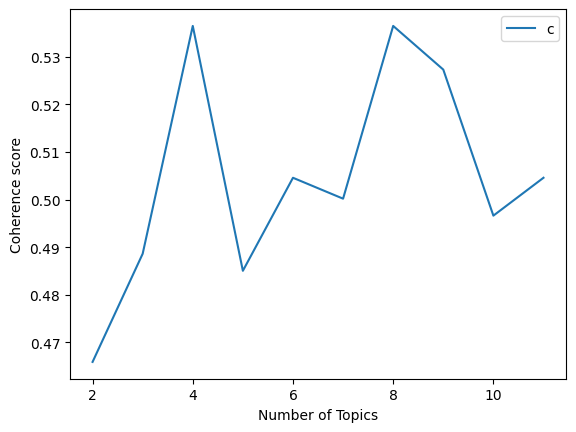

In [82]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [83]:
import pandas as pd
import numpy as np
import matplotlib

# matplotlib.use('TkAgg')  # noqa
import seaborn  # noqa
from matplotlib import pyplot as plt


tdm = pd.DataFrame([list(t) for t in '101000 010000 110000 100110 000101'.split()],
                   columns=['d{}'.format(i) for i in range(6)],
                   index='ship boat ocean voyage trip'.split()).astype(int)
tdm

,d0,d1,d2,d3,d4,d5
ship,1,0,1,0,0,0
boat,0,1,0,0,0,0
ocean,1,1,0,0,0,0
voyage,1,0,0,1,1,0
trip,0,0,0,1,0,1


In [86]:
u, s, vt = np.linalg.svd(tdm)


In [87]:
u = pd.DataFrame(u, index=tdm.index)
u.round(2)

,0,1,2,3,4
ship,0.44,-0.30,-0.57,0.58,-0.25
boat,0.13,-0.33,0.59,0.00,-0.73
ocean,0.48,-0.51,0.37,0.00,0.61
voyage,0.70,0.35,-0.15,-0.58,-0.16
trip,0.26,0.65,0.41,0.58,0.09


In [88]:
smat = np.zeros(tdm.shape)
for i, value in enumerate(s):
    smat[i, i] = value
smat = pd.DataFrame(smat, columns=tdm.columns, index=tdm.index)
smat.round(2)

,d0,d1,d2,d3,d4,d5
ship,2.16,0.00,0.00,0.0,0.00,0.0
boat,0.00,1.59,0.00,0.0,0.00,0.0
ocean,0.00,0.00,1.28,0.0,0.00,0.0
voyage,0.00,0.00,0.00,1.0,0.00,0.0
trip,0.00,0.00,0.00,0.0,0.39,0.0


In [89]:
vt = pd.DataFrame(vt, index=['d{}'.format(i) for i in range(6)])
print(vt.round(2))

       0     1     2     3     4     5
d0  0.75  0.28  0.20  0.45  0.33  0.12
d1 -0.29 -0.53 -0.19  0.63  0.22  0.41
d2 -0.28  0.75 -0.45  0.20 -0.12  0.33
d3 -0.00  0.00  0.58  0.00 -0.58  0.58
d4  0.53 -0.29 -0.63 -0.19 -0.41  0.22
d5  0.00 -0.00 -0.00 -0.58  0.58  0.58


In [90]:
# Reconstruct the original term-document matrix.
# The sum of the squares of the error is 0.

tdm_prime = u.values.dot(smat.values).dot(vt.values)
print(tdm_prime.round(2))

[[ 1. -0.  1. -0. -0. -0.]
 [-0.  1. -0. -0.  0. -0.]
 [ 1.  1. -0.  0. -0.  0.]
 [ 1.  0. -0.  1.  1.  0.]
 [-0.  0. -0.  1.  0.  1.]]


In [91]:
err = [np.sqrt(((tdm_prime - tdm).values.flatten() ** 2).sum() / np.product(tdm.shape))]
print(err[-1])

3.734661281848602e-16


In [92]:
smat2 = smat.copy()
for numdim in range(len(s) - 1, 0, -1):
    smat2.iloc[numdim, numdim] = 0
    print(np.diag(smat2.round(2)))
    #           d0    d1   d2   d3   d4   d5
    # ship    2.16  0.00  0.0  0.0  0.0  0.0
    # boat    0.00  1.59  0.0  0.0  0.0  0.0
    # ocean   0.00  0.00  0.0  0.0  0.0  0.0
    # voyage  0.00  0.00  0.0  0.0  0.0  0.0
    # trip    0.00  0.00  0.0  0.0  0.0  0.0

    tdm_prime2 = u.values.dot(smat2.values).dot(vt.values)
    err += [np.sqrt(((tdm_prime2 - tdm).values.flatten() ** 2).sum() / np.product(tdm.shape))]
    print(err[-1])


[2.16 1.59 1.28 1.   0.  ]
0.07191875614705566
[2.16 1.59 1.28 0.   0.  ]
0.19622854231500828
[2.16 1.59 0.   0.   0.  ]
0.3044960016348779
[2.16 0.   0.   0.   0.  ]
0.4212516899291381


[3.734661281848602e-16, 0.07191875614705566, 0.19622854231500828, 0.3044960016348779, 0.4212516899291381]


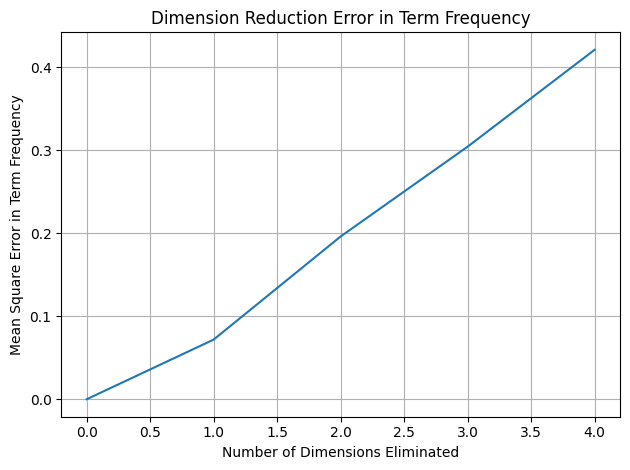

In [93]:
plt.plot(range(len(err)), err)
plt.title('Dimension Reduction Error in Term Frequency')
plt.xlabel('Number of Dimensions Eliminated')
plt.ylabel('Mean Square Error in Term Frequency')
plt.grid('on')
plt.tight_layout()
print(err)




We have done PCA/SVD (LSA) & LDiA + LDA with just 16 dimensions for spam classification. 

Attempting now 2, 4, 8, 16, 32 etc dimensions. Comparing the accuracy and indicate which is best for the same dataset.


In [103]:



from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split as train_test_split

results = {}
for n_components in [2, 4, 8, 16, 32 , 64]:
    svd = TruncatedSVD(n_components=n_components, n_iter=10, random_state=42)
    pca_topic_vectors = pd.DataFrame(svd.fit_transform(tfidf_docs), index=index)
    X_train, X_test, y_train, y_test = train_test_split(pca_topic_vectors.values, sms.spam, test_size=0.3, random_state=271828)
    lda = LDA(n_components=1)
    lda.fit(X_train, y_train)
    results[n_components] = round(lda.score(X_test, y_test), 3)

print(results)

{2: 0.879, 4: 0.882, 8: 0.953, 16: 0.963, 32: 0.972, 64: 0.972}


In [102]:


from sklearn.decomposition import LatentDirichletAllocation as LDiA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split as train_test_split

results = {}
for n_components in [2, 4, 8, 16, 32 , 64]:
    ldia = LDiA(n_components=n_components, learning_method='batch')
    ldia = ldia.fit(bow_docs)
    ldia_topic_vectors = pd.DataFrame(ldia.transform(bow_docs), index=index)
    X_train, X_test, y_train, y_test = train_test_split(ldia_topic_vectors.values, sms.spam, test_size=0.3, random_state=271828)
    lda = LDA(n_components=1)
    lda.fit(X_train, y_train)
    results[n_components] = round(lda.score(X_test, y_test), 3)

print(results)


{2: 0.882, 4: 0.877, 8: 0.894, 16: 0.913, 32: 0.924, 64: 0.91}


**Conclusion**

We can see that the results vary for various values of n components by comparing the accuracy of the two methods. Both methods achieve an accuracy of about 0.88 for n components=2. However, Method 1 achieves greater accuracy than Method 2 as the number of components rises. For instance, Method 1 achieves an accuracy of 0.972 for n components=64 while Method 2 achieves an accuracy of 0.91.

With regard to classification accuracy for this specific dataset and range of n components, we can therefore say that Method 1 performs better overall than Method 2. It's important to keep in mind, though, that the method chosen may depend on the specifics of the dataset and the objectives of the analysis.